In [57]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 12]

In [58]:
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='float64', skiprows=2)
print(data)

[[-305.  -435.    85.5    5.     5.    85.5]
 [-295.  -435.    85.5    5.     5.    85.5]
 [-285.  -435.    85.5    5.     5.    85.5]
 ...
 [ 435.   465.     8.     5.     5.     8. ]
 [ 445.   465.     8.     5.     5.     8. ]
 [ 455.   465.     8.     5.     5.     8. ]]


In [59]:
def create_grid(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min)))
    east_size = int(np.ceil((east_max - east_min)))

    grid = np.zeros((north_size, east_size))

    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        
        if alt + d_alt + safety_distance > drone_altitude:
            obstacle_north = [
                int(north - d_north - safety_distance - north_min), # from
                int(north + d_north + safety_distance - north_min), # to
            ]

            obstacle_east = [
                int(east - d_east - safety_distance - east_min), # from
                int(east + d_east + safety_distance - east_min), # to
            ] 

            grid[obstacle_north[0]:obstacle_north[1], obstacle_east[0]:obstacle_east[1]] = 1
            
    return grid

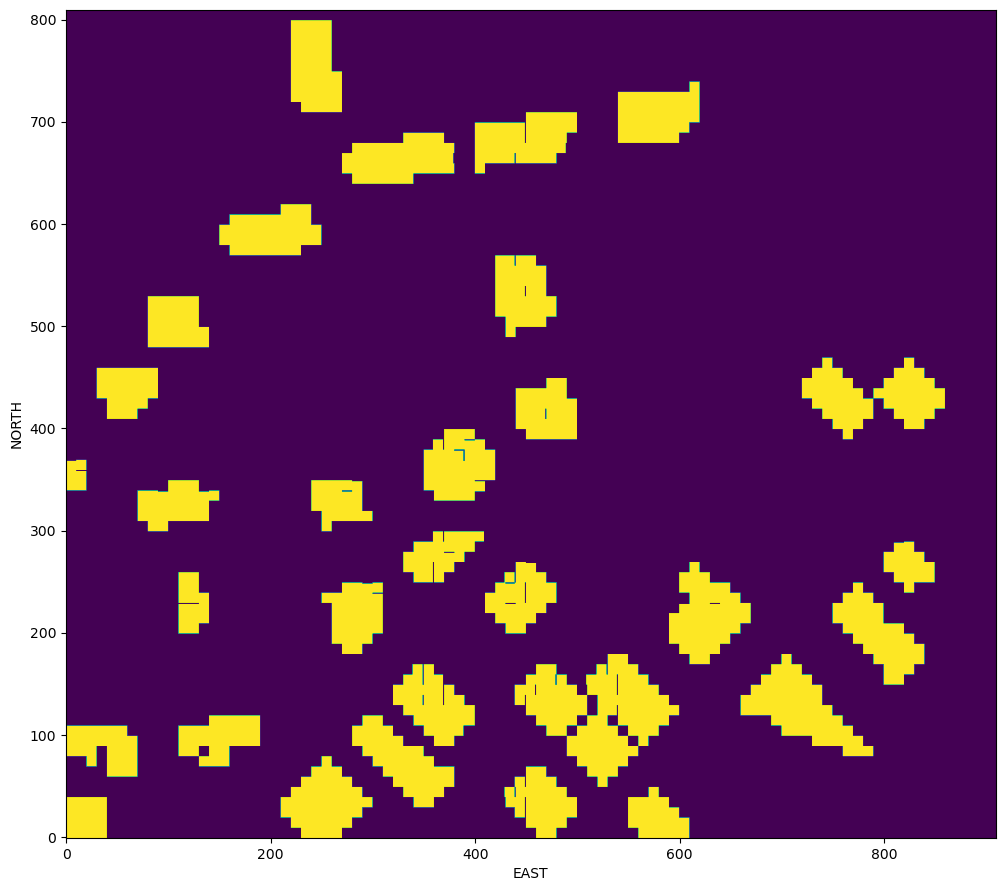

In [60]:
drone_altitude = 93 # Static drone altitude (metres)
safe_distance = 0

grid = create_grid(data, drone_altitude, safe_distance)

# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower') 

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()